# Introduction and Background

Tokyo is well known to have one of the busiest train stations in the world. As a densely populated area, it is important to efficiently navigate through the stations to minimize travel time. The goal of this project be a simulation of the Tokyo railway system using Prim's algorithm. This experiment will optimize a complicated network of different paths.

There is three total phases: \
First, we will create our 30 stations using a real map. Second we will generate edges using random number generator (RNG) to simulate different travel times. Finally we will run Prim's algorithm and get our Minimum Spanning Tree, cost, and plot of the MST.

Case study: \
In the Implementation, a focused case study will be done with 8 vertices and 10 edges.
This approach demonstrates each step of Prim's algorithm, and the results become an optimization of the network on a small-scale. The insights gained through this case study will be used in the main implementation code. We aim to guide the project to its desired solution from what was learned here.

In the upcoming sections, we will explain how this is demonstrated and how the results can be applied to solve the main problem of how to optimize Tokyo's busy railway station network.

# Project Specification

Goals and Objective:

- Python and C++ Jupyter Notebook

Python Libraries: 

- numpy: to do matrix operations for finding a 30 x 30 matrix for prims.
- random: to generate random edge weights indexes inside the matrix for the railway stations.
- networkx: to plot the Minimum Spanning Tree.
- matplotlib: to visualize the Minimum Spanning Tree.

C++ Libraries:

- iostream: for outputting the results of the code.
- vector: used in the graph and verticies part of the code.
- limits: used to set the key to infinity.
- tuple: used for the costWeights() function to get the total cost from MST.

Problem Design:

- The starting point is Shinjuku station. From this station we get stations that are close to it and start counting all the stations in the map.
- The MST has to be symmetric so the Prim's algorithm will run correctly. We start with a small 3x3 matrix, code the algorithm and see the result. If a 3x3 matrix is successful, a 30 x 30 matrix will be achievable.
- Make the cost function after running the Prim's algorithm, and use a calculator to verify the total weights from the function match the total from the calculator.
- Finally take the sample code from the networkx website of plotting Minimum Spanning Trees and modify it so that it matches our graph. The names will be long so the figure size has to be changed. The figure size that was consistent in not overlapping long station names was 18 x 8. Change the colors of the graph for higher visibility.

Expected Solution:

- The expected solution of this problem is to have an optimized network of Tokyo railway stations shown on a graph as a result of Prim's Algorithm for Minimum Spanning Trees.

# Case Study

<strong>Step 1 Minimum Spanning Tree:</strong>
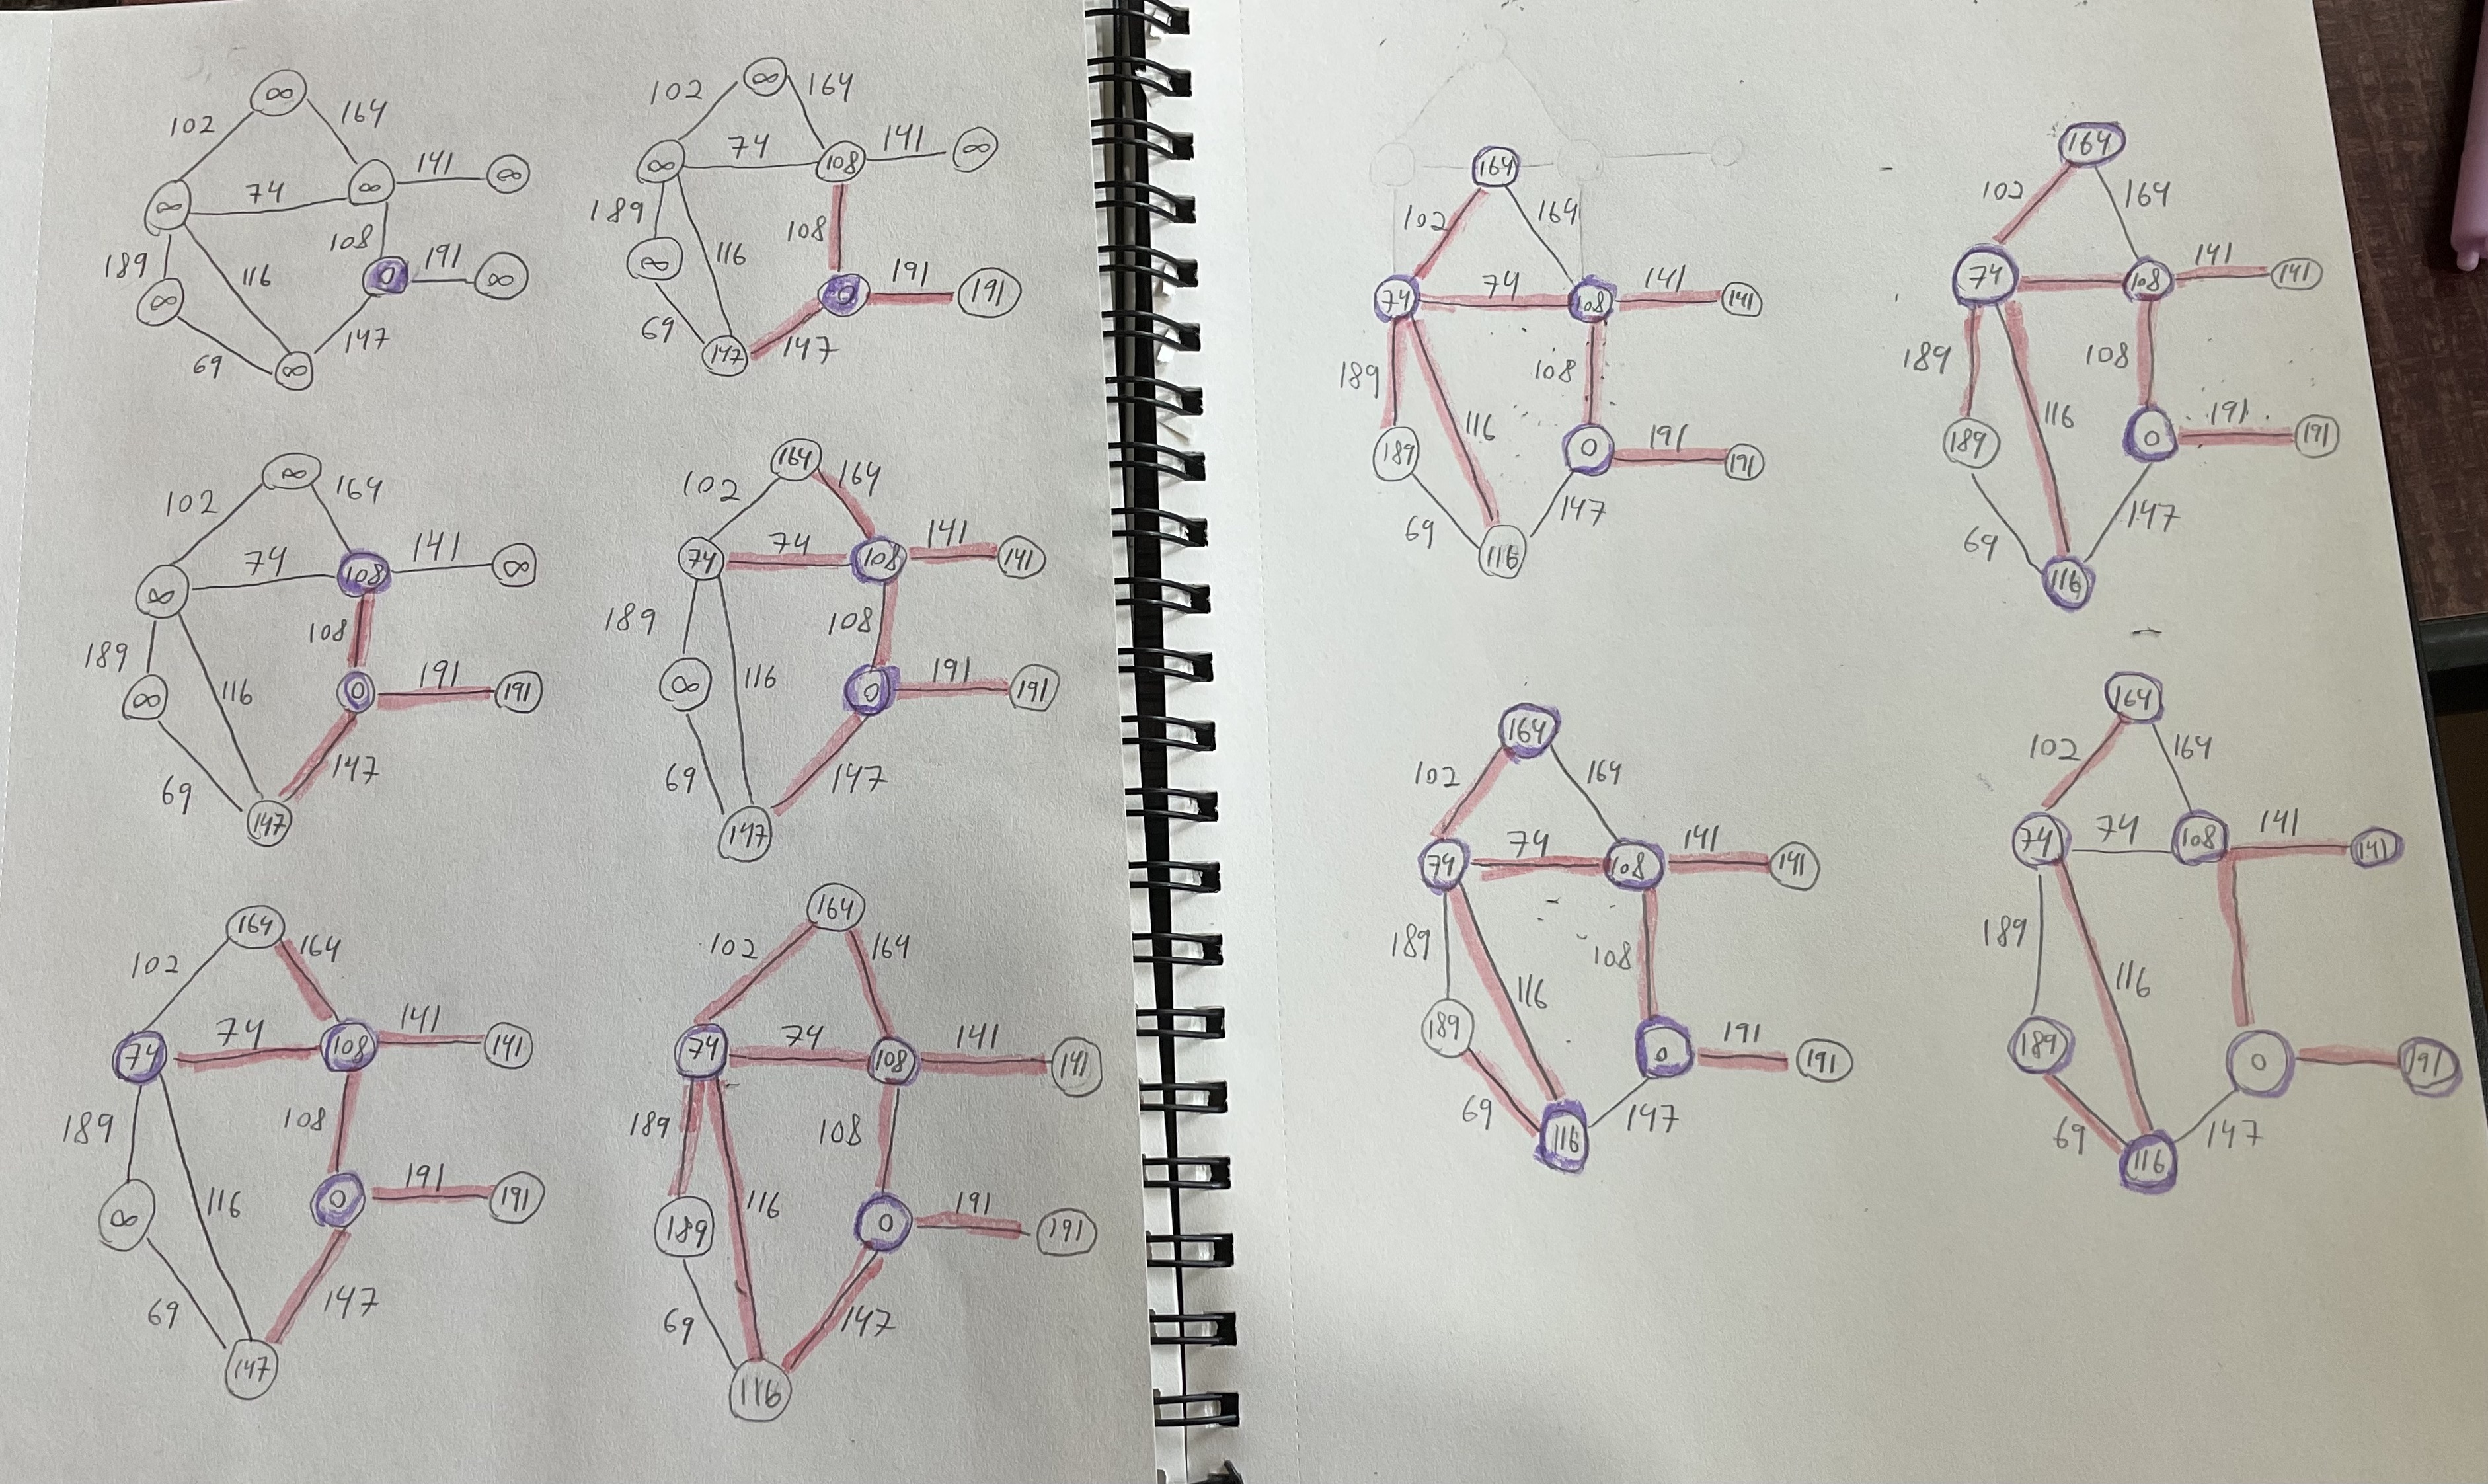

<strong>Step 2 Explain:</strong>
Algorithm steps:
1) Start at node zero
3) At each step choose the smallest edge that connects to a new node.
4) Now we are at that new node. Repeat step 2.
5) Repeat until all the required nodes are in the MST.

The purple-circled nodes are the vertices that are in MST.
The pink lines show the edges selected during the iterations of Prim's.

## Run time analysis

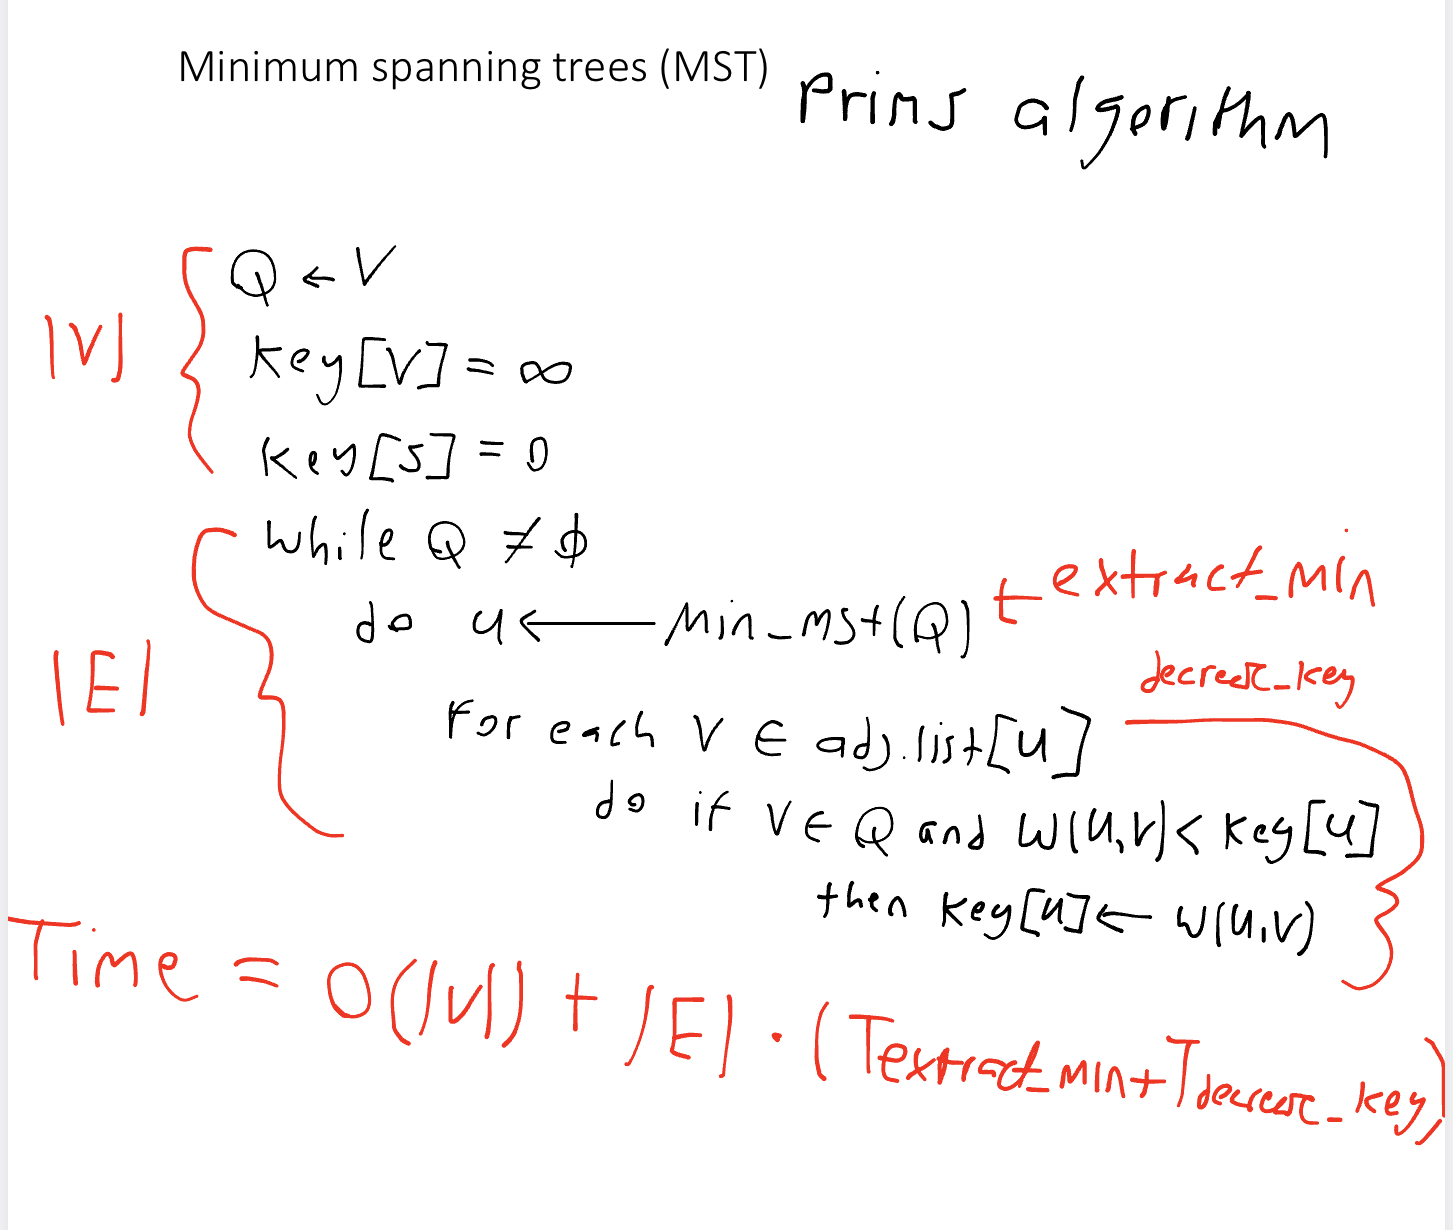

# Implementation

The figures A and B above are the screenshots of the maps starting from Shinjuku Station, to the other train stations.

Below is a Python script that will generate 30 edges. Each edge represents various travel times between each station. Since real travel times are hard to obtain we used random number generation (RNG) to simulate travel times. To make the results reproducable, we used a fixed random seed using the random.seed() method for generating weights. Since we found the best random seed in the case study, we trust it for the implementation.

The travel times are randomly selected in range between (40 to 300) minutes. The times between stations closely identify real world transit times that would be obtained for this model.

In [1]:
import random
import numpy as np

random.seed(41876)

n = 30
    
matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(i + 1, n):
        weight = random.randint(40, 300)
        matrix[i][j] = weight
        matrix[j][i] = weight

#weight_matrix = "[" + ",\n ".join(["[" + ", ".join(map(str, row)) + "]" for row in matrix]) + "]"
weight_matrix = "vector<vector<int>> graph = {\n" + ",\n ".join(["{" + ", ".join(map(str, row)) + "}" for row in matrix]) + "\n};"
print(weight_matrix)

vector<vector<int>> graph = {
{0, 119, 60, 165, 67, 170, 221, 289, 256, 76, 66, 91, 135, 40, 160, 64, 283, 229, 180, 55, 77, 70, 210, 240, 155, 122, 193, 263, 66, 60},
 {119, 0, 278, 201, 260, 256, 135, 96, 236, 254, 95, 155, 210, 283, 146, 148, 169, 94, 72, 135, 236, 192, 84, 76, 287, 202, 171, 142, 265, 227},
 {60, 278, 0, 290, 70, 281, 254, 112, 204, 91, 241, 102, 247, 277, 110, 118, 234, 69, 180, 155, 267, 186, 290, 241, 263, 68, 160, 192, 156, 264},
 {165, 201, 290, 0, 40, 187, 126, 72, 198, 170, 58, 225, 176, 167, 86, 129, 189, 79, 253, 210, 215, 257, 153, 277, 150, 42, 96, 90, 224, 130},
 {67, 260, 70, 40, 0, 224, 61, 110, 95, 134, 237, 75, 284, 272, 225, 86, 115, 82, 40, 177, 92, 263, 276, 97, 186, 48, 135, 247, 122, 113},
 {170, 256, 281, 187, 224, 0, 130, 204, 146, 252, 260, 81, 79, 135, 259, 180, 265, 92, 102, 114, 215, 269, 85, 178, 248, 245, 120, 298, 128, 85},
 {221, 135, 254, 126, 61, 130, 0, 269, 290, 192, 80, 94, 276, 179, 44, 72, 139, 227, 196, 264, 232, 163, 224, 217

In [1]:
#include <iostream>
#include <vector>
#include <limits>
#include <string>
#include <tuple>

In [2]:
using namespace std;

In [3]:
class PrimsAlgorithm {
public:
    vector<vector<int>> graph;
    vector<string> vertices;

    PrimsAlgorithm(const vector<vector<int>>& graph, const vector<string>& vertices) {
        this->graph = graph;
        this->vertices = vertices;
    }

    void printMST(const vector<int>& parent) {
        cout << "Edge \tWeight\n";
        for (int i = 1; i < vertices.size(); ++i) {
            cout << vertices[parent[i]] << " - " << vertices[i] << "\t" << graph[i][parent[i]] << "\n";
        }
    }

    int minKey(const vector<int>& key, const vector<bool>& mstSet) {
        int min = numeric_limits<int>::max();
        int minIndex = -1;

        for (int i = 0; i < vertices.size(); ++i) {
            if (!mstSet[i] && key[i] < min) {
                min = key[i];
                minIndex = i;
            }
        }
        return minIndex;
    }

    void primsAlgorithm() {
        vector<int> key(vertices.size(), numeric_limits<int>::max());
        vector<int> parent(vertices.size(), -1);
        vector<bool> mstSet(vertices.size(), false);

        key[0] = 0;
        
        for (int count = 0; count < vertices.size() - 1; ++count) {
            
            int u = minKey(key, mstSet);
            
            mstSet[u] = true;
            
            for (int v = 0; v < vertices.size(); ++v) {
                
                if (graph[u][v] && !mstSet[v] && graph[u][v] < key[v]) {
                    parent[v] = u;
                    key[v] = graph[u][v];
                }
            }
        }
        
        printMST(parent);
    }
};

In [4]:
int main() {
    vector<vector<int>> graph = {
    {0, 119, 60, 165, 67, 170, 221, 289, 256, 76, 66, 91, 135, 40, 160, 64, 283, 229, 180, 55, 77, 70, 210, 240, 155, 122, 193, 263, 66, 60},
     {119, 0, 278, 201, 260, 256, 135, 96, 236, 254, 95, 155, 210, 283, 146, 148, 169, 94, 72, 135, 236, 192, 84, 76, 287, 202, 171, 142, 265, 227},
     {60, 278, 0, 290, 70, 281, 254, 112, 204, 91, 241, 102, 247, 277, 110, 118, 234, 69, 180, 155, 267, 186, 290, 241, 263, 68, 160, 192, 156, 264},
     {165, 201, 290, 0, 40, 187, 126, 72, 198, 170, 58, 225, 176, 167, 86, 129, 189, 79, 253, 210, 215, 257, 153, 277, 150, 42, 96, 90, 224, 130},
     {67, 260, 70, 40, 0, 224, 61, 110, 95, 134, 237, 75, 284, 272, 225, 86, 115, 82, 40, 177, 92, 263, 276, 97, 186, 48, 135, 247, 122, 113},
     {170, 256, 281, 187, 224, 0, 130, 204, 146, 252, 260, 81, 79, 135, 259, 180, 265, 92, 102, 114, 215, 269, 85, 178, 248, 245, 120, 298, 128, 85},
     {221, 135, 254, 126, 61, 130, 0, 269, 290, 192, 80, 94, 276, 179, 44, 72, 139, 227, 196, 264, 232, 163, 224, 217, 69, 204, 141, 189, 219, 137},
     {289, 96, 112, 72, 110, 204, 269, 0, 51, 268, 76, 75, 211, 281, 58, 145, 260, 51, 92, 263, 294, 99, 220, 92, 185, 204, 288, 52, 54, 80},
     {256, 236, 204, 198, 95, 146, 290, 51, 0, 68, 47, 214, 61, 207, 86, 108, 222, 227, 266, 241, 233, 79, 119, 150, 228, 246, 149, 169, 139, 217},
     {76, 254, 91, 170, 134, 252, 192, 268, 68, 0, 118, 276, 252, 261, 114, 52, 128, 119, 62, 221, 188, 227, 51, 206, 137, 195, 139, 167, 168, 71},
     {66, 95, 241, 58, 237, 260, 80, 76, 47, 118, 0, 205, 120, 222, 87, 62, 263, 199, 91, 103, 194, 224, 207, 74, 201, 224, 98, 241, 191, 88},
     {91, 155, 102, 225, 75, 81, 94, 75, 214, 276, 205, 0, 294, 91, 40, 251, 277, 120, 147, 213, 187, 183, 270, 268, 207, 127, 111, 292, 175, 259},
     {135, 210, 247, 176, 284, 79, 276, 211, 61, 252, 120, 294, 0, 152, 121, 176, 218, 61, 173, 215, 98, 183, 157, 148, 84, 195, 132, 132, 47, 107},
     {40, 283, 277, 167, 272, 135, 179, 281, 207, 261, 222, 91, 152, 0, 286, 168, 178, 203, 224, 198, 173, 270, 115, 162, 299, 269, 247, 205, 107, 264},
     {160, 146, 110, 86, 225, 259, 44, 58, 86, 114, 87, 40, 121, 286, 0, 210, 150, 98, 91, 230, 296, 194, 293, 246, 250, 216, 152, 224, 143, 192},
     {64, 148, 118, 129, 86, 180, 72, 145, 108, 52, 62, 251, 176, 168, 210, 0, 74, 108, 212, 85, 252, 196, 121, 137, 90, 241, 205, 123, 235, 231},
     {283, 169, 234, 189, 115, 265, 139, 260, 222, 128, 263, 277, 218, 178, 150, 74, 0, 140, 293, 62, 290, 138, 271, 112, 132, 67, 91, 114, 90, 104},
     {229, 94, 69, 79, 82, 92, 227, 51, 227, 119, 199, 120, 61, 203, 98, 108, 140, 0, 89, 188, 127, 276, 275, 149, 179, 106, 86, 247, 81, 136},
     {180, 72, 180, 253, 40, 102, 196, 92, 266, 62, 91, 147, 173, 224, 91, 212, 293, 89, 0, 45, 126, 194, 294, 181, 254, 161, 170, 102, 194, 94},
     {55, 135, 155, 210, 177, 114, 264, 263, 241, 221, 103, 213, 215, 198, 230, 85, 62, 188, 45, 0, 195, 125, 157, 218, 177, 99, 150, 119, 80, 73},
     {77, 236, 267, 215, 92, 215, 232, 294, 233, 188, 194, 187, 98, 173, 296, 252, 290, 127, 126, 195, 0, 268, 189, 290, 174, 141, 197, 101, 258, 198},
     {70, 192, 186, 257, 263, 269, 163, 99, 79, 227, 224, 183, 183, 270, 194, 196, 138, 276, 194, 125, 268, 0, 190, 216, 290, 131, 93, 283, 219, 49},
     {210, 84, 290, 153, 276, 85, 224, 220, 119, 51, 207, 270, 157, 115, 293, 121, 271, 275, 294, 157, 189, 190, 0, 100, 247, 43, 244, 140, 97, 229},
     {240, 76, 241, 277, 97, 178, 217, 92, 150, 206, 74, 268, 148, 162, 246, 137, 112, 149, 181, 218, 290, 216, 100, 0, 67, 92, 263, 182, 133, 272},
     {155, 287, 263, 150, 186, 248, 69, 185, 228, 137, 201, 207, 84, 299, 250, 90, 132, 179, 254, 177, 174, 290, 247, 67, 0, 106, 56, 46, 162, 169},
     {122, 202, 68, 42, 48, 245, 204, 204, 246, 195, 224, 127, 195, 269, 216, 241, 67, 106, 161, 99, 141, 131, 43, 92, 106, 0, 83, 206, 68, 285},
     {193, 171, 160, 96, 135, 120, 141, 288, 149, 139, 98, 111, 132, 247, 152, 205, 91, 86, 170, 150, 197, 93, 244, 263, 56, 83, 0, 284, 146, 244},
     {263, 142, 192, 90, 247, 298, 189, 52, 169, 167, 241, 292, 132, 205, 224, 123, 114, 247, 102, 119, 101, 283, 140, 182, 46, 206, 284, 0, 190, 150},
     {66, 265, 156, 224, 122, 128, 219, 54, 139, 168, 191, 175, 47, 107, 143, 235, 90, 81, 194, 80, 258, 219, 97, 133, 162, 68, 146, 190, 0, 46},
     {60, 227, 264, 130, 113, 85, 137, 80, 217, 71, 88, 259, 107, 264, 192, 231, 104, 136, 94, 73, 198, 49, 229, 272, 169, 285, 244, 150, 46, 0}
    };

    vector<string> vertices = {"Shinjuku", "Yoyogi-Uehara", "Ikebukuro", "Nakano", "Ogikubo", "Kanegafuchi", "Kameido", "Ayase", "Nippori", "Nishiarai", "Shin-kiba", "Akabane", "Nerima", "Shimbashi", "Oimachi", "Shinagawa", "Tamagawa", "Ookayama", "Mizonokuchi", "Kawasaki", "Kamata", "Motosumiyoshi", "Azamino", "Tsurumi", "Shin-Yokohama", "Higashi-Kanagawa", "Nishiya", "Futamata-Gawa", "Kannai", "Higashi-Totsuka"};
    PrimsAlgorithm primsAlgorithm(graph, vertices);
    primsAlgorithm.primsAlgorithm();

    return 0;
}

In [5]:
main();

Edge 	Weight
Mizonokuchi - Yoyogi-Uehara	72
Shinjuku - Ikebukuro	60
Ogikubo - Nakano	40
Mizonokuchi - Ogikubo	40
Nerima - Kanegafuchi	79
Oimachi - Kameido	44
Nippori - Ayase	51
Shin-kiba - Nippori	47
Azamino - Nishiarai	51
Nakano - Shin-kiba	58
Oimachi - Akabane	40
Kannai - Nerima	47
Shinjuku - Shimbashi	40
Ayase - Oimachi	58
Nishiarai - Shinagawa	52
Kawasaki - Tamagawa	62
Ayase - Ookayama	51
Kawasaki - Mizonokuchi	45
Shinjuku - Kawasaki	55
Shinjuku - Kamata	77
Higashi-Totsuka - Motosumiyoshi	49
Higashi-Kanagawa - Azamino	43
Shin-Yokohama - Tsurumi	67
Futamata-Gawa - Shin-Yokohama	46
Nakano - Higashi-Kanagawa	42
Shin-Yokohama - Nishiya	56
Ayase - Futamata-Gawa	52
Ayase - Kannai	54
Kannai - Higashi-Totsuka	46


In [8]:
int costWeights() {
    
    vector<tuple<string, string, int>> edges = {
        {"Mizonokuchi", "Yoyogi-Uehara", 72},
        {"Shinjuku", "Ikebukuro", 60},
        {"Ogikubo", "Nakano", 40},
        {"Mizonokuchi", "Ogikubo", 40},
        {"Nerima", "Kanegafuchi", 79},
        {"Oimachi", "Kameido", 44},
        {"Nippori", "Ayase", 51},
        {"Shin-kiba", "Nippori", 47},
        {"Azamino", "Nishiarai", 51},
        {"Nakano", "Shin-kiba", 58},
        {"Oimachi", "Akabane", 40},
        {"Kannai", "Nerima", 47},
        {"Shinjuku", "Shimbashi", 40},
        {"Ayase", "Oimachi", 58},
        {"Nishiarai", "Shinagawa", 52},
        {"Kawasaki", "Tamagawa", 62},
        {"Ayase", "Ookayama", 51},
        {"Kawasaki", "Mizonokuchi", 45},
        {"Shinjuku", "Kawasaki", 55},
        {"Shinjuku", "Kamata", 77},
        {"Higashi-Totsuka", "Motosumiyoshi", 49},
        {"Higashi-Kanagawa", "Azamino", 43},
        {"Shin-Yokohama", "Tsurumi", 67},
        {"Futamata-Gawa", "Shin-Yokohama", 46},
        {"Nakano", "Higashi-Kanagawa", 42},
        {"Shin-Yokohama", "Nishiya", 56},
        {"Ayase", "Futamata-Gawa", 52},
        {"Ayase", "Kannai", 54},
        {"Kannai", "Higashi-Totsuka", 46},
    };

    int totalCost = 0;
    for (const auto& edge : edges) {
        totalCost += get<2>(edge);
    }

    cout << "Total cost (sum of all edge weights): " << totalCost;

    return 0;
}

In [9]:
costWeights();

Total cost (sum of all edge weights): 1524

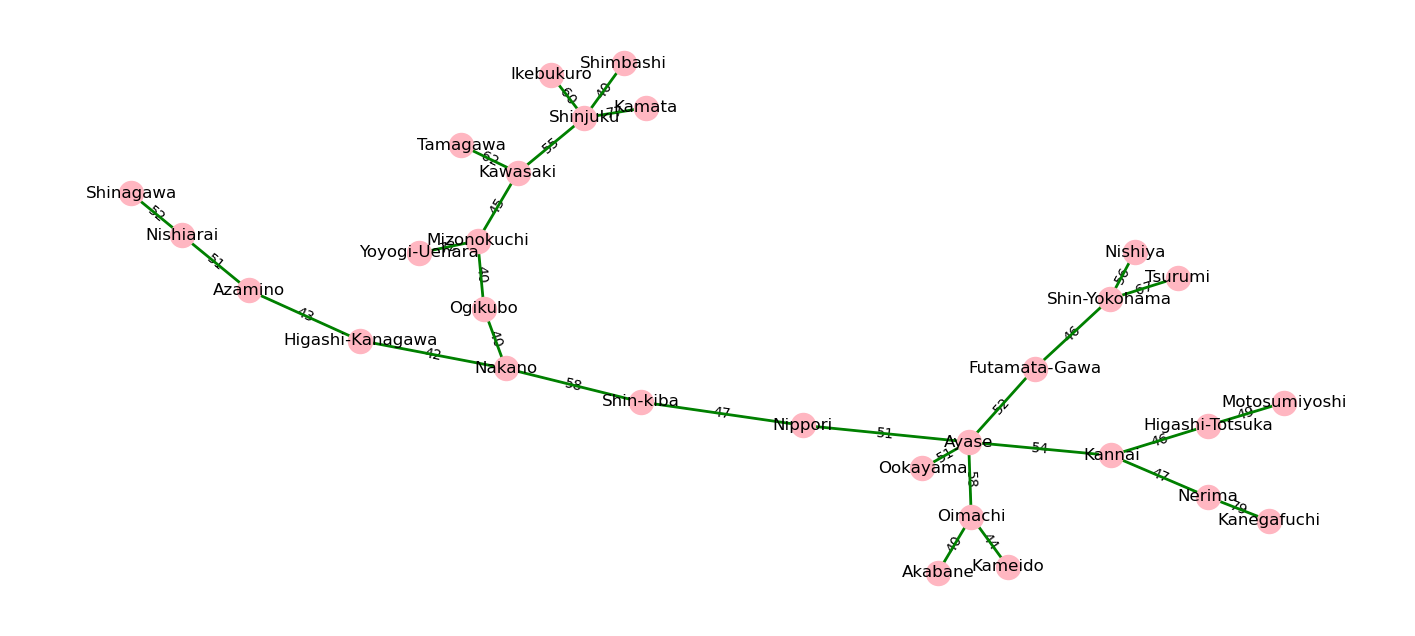

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [
        ("Mizonokuchi", "Yoyogi-Uehara", {"weight": 72}),
        ("Shinjuku", "Ikebukuro", {"weight": 60}),
        ("Ogikubo", "Nakano", {"weight": 40}),
        ("Mizonokuchi", "Ogikubo", {"weight": 40}),
        ("Nerima", "Kanegafuchi", {"weight": 79}),
        ("Oimachi", "Kameido", {"weight": 44}),
        ("Nippori", "Ayase", {"weight": 51}),
        ("Shin-kiba", "Nippori", {"weight": 47}),
        ("Azamino", "Nishiarai", {"weight": 51}),
        ("Nakano", "Shin-kiba", {"weight": 58}),
        ("Oimachi", "Akabane", {"weight": 40}),
        ("Kannai", "Nerima", {"weight": 47}),
        ("Shinjuku", "Shimbashi", {"weight": 40}),
        ("Ayase", "Oimachi", {"weight": 58}),
        ("Nishiarai", "Shinagawa", {"weight": 52}),
        ("Kawasaki", "Tamagawa", {"weight": 62}),
        ("Ayase", "Ookayama", {"weight": 51}),
        ("Kawasaki", "Mizonokuchi", {"weight": 45}),
        ("Shinjuku", "Kawasaki", {"weight": 55}),
        ("Shinjuku", "Kamata", {"weight": 77}),
        ("Higashi-Totsuka",  "Motosumiyoshi", {"weight": 49}),
        ("Higashi-Kanagawa",  "Azamino", {"weight": 43}),
        ("Shin-Yokohama",  "Tsurumi", {"weight": 67}),
        ("Futamata-Gawa",  "Shin-Yokohama", {"weight": 46}),
        ("Nakano",  "Higashi-Kanagawa", {"weight": 42}),
        ("Shin-Yokohama",  "Nishiya", {"weight": 56}),
        ("Ayase",  "Futamata-Gawa", {"weight": 52}),
        ("Ayase",  "Kannai", {"weight": 54}),
        ("Kannai",  "Higashi-Totsuka", {"weight": 46}),
    ]
)

T = nx.minimum_spanning_tree(G)

pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(18, 8))
nx.draw_networkx_nodes(G, pos, node_color="lightpink", node_size=300)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}
)
nx.draw_networkx_edges(T, pos, edge_color="green", width=2)
plt.axis("off")
plt.show()

# Reference
[geeksforgeeks mst] https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/ \
[networkx plotting mst] https://networkx.org/documentation/stable/auto_examples/graph/plot_mst.html \
[minimum spanning tree] https://en.wikipedia.org/wiki/Minimum_spanning_tree \
[prim's algorithm] https://en.wikipedia.org/wiki/Prim%27s_algorithm

# Summary

In this project, we ran multiple simulations and experiments on Minimum Spanning Tree using Tokyo's railway stations. We started by working on the Prim's algorithm code in C++. The first implementation only represented vertices as integers 0, 1, 2 and we later had to change them to chars. The printMST() function needed to be changed for the new vertices. We ran a small test of the MST in the Visual Studio debugger multiple times to gather the small MST results. Before running the case study, all the code has been checked and verified to be bug free in Visual Studio Code. To illustrate the functionality of the algorithm, we ran the case study with 8 vertices including randomized edges to visualize a Minimum Spanning Tree. After that, we did the implementation with a randomly chosen seed 41876, but with 30 nodes and vertices to conduct the main experiment. Finally, we successfully implemented a cost function, and plot of the minimum spanning tree using Prim's algorithm. The final implementation produced the desired result, providing a clear visualization of optimal connections in Tokyo's railway network. The algorithm proved to be efficient and effective in finding the minimum spanning tree. In conclusion, this project demonstrated the application of Prim's algorithm in solving minimal spanning tree problem. Through the processes, we learned a creative way to solve a complicated problem that involved lots of work and dedication. This project shows that optimizing Tokyo's railway stations can be used in the transportation sciences to optimize network connections and minimize costs.